In [1]:
import pyscal.core as pc
import pyscal.crystal_structures as pcs
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from pymolsim import Sim
from pymolsim.potential import LJ

In [3]:
sys = pc.System()
sys.read_inputfile("conf.dump", customkeys=["mass", "vx", "vy", "vz"])
atoms = sys.atoms
box = sys.box

In [4]:
sim = Sim(atoms, box)

In [5]:
sim.beta = 0.5
sim.pressure = 0
sim.dt = 0.0025
lj = LJ(1.0, 1.0)
sim.potential = lj
sim.start()
sim.forces()

/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/pymolsim-0.0.1-py3.7.egg/pymolsim/potential.py:34: RuntimeWarning: divide by zero encountered in true_divide
/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/pymolsim-0.0.1-py3.7.egg/pymolsim/potential.py:38: RuntimeWarning: invalid value encountered in true_divide
/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/pymolsim-0.0.1-py3.7.egg/pymolsim/potential.py:44: RuntimeWarning: divide by zero encountered in true_divide


In [6]:
sim.dump(0)

In [8]:
temps = []
for i in tqdm(range(1, 1000)):
    sim.run()
    #sim.rescale_velocities()
    sim.remap()
    temps.append(sim.temperature)
    if i%100 ==0:
        sim.dump(i)

100%|██████████| 999/999 [00:24<00:00, 40.02it/s]


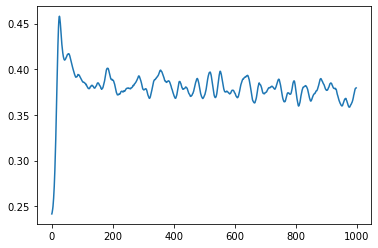

In [8]:
plt.plot(1/np.array(temps))